In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('TATAMOTORS.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,175.350006,21438351


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1041,2023-03-16,413.299988,418.500000,405.000000,415.700012,415.700012,11854885
1042,2023-03-17,419.000000,423.450012,414.549988,419.000000,419.000000,8658701
1043,2023-03-20,415.600006,416.950012,405.500000,410.750000,410.750000,10075022
1044,2023-03-21,412.850006,413.899994,407.700012,412.549988,412.549988,7391950
1045,2023-03-22,416.000000,418.399994,413.750000,416.100006,416.100006,5728054


In [5]:
sub_df = df[["Close"]]
sub_df

,Close
0,173.449997
1,168.550003
2,166.050003
3,170.949997
4,175.350006
...,...
1041,415.700012
1042,419.000000
1043,410.750000
1044,412.549988


In [6]:
from sklearn.preprocessing import MinMaxScaler

returns= sub_df['Close'].pct_change()
column_names = sub_df.columns
x = sub_df.values

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

pct_close = pd.DataFrame(x_scaled)
pct_close.columns = column_names
pct_close

,Close
0,0.232656
1,0.222115
2,0.216737
3,0.227278
4,0.236743
...,...
1041,0.753792
1042,0.760891
1043,0.743143
1044,0.747015


In [7]:
pc = pd.DataFrame(returns)
pc = pc[1:]
pc

,Close
1,-0.028250
2,-0.014832
3,0.029509
4,0.025739
5,0.026233
...,...
1041,0.010575
1042,0.007938
1043,-0.019690
1044,0.004382


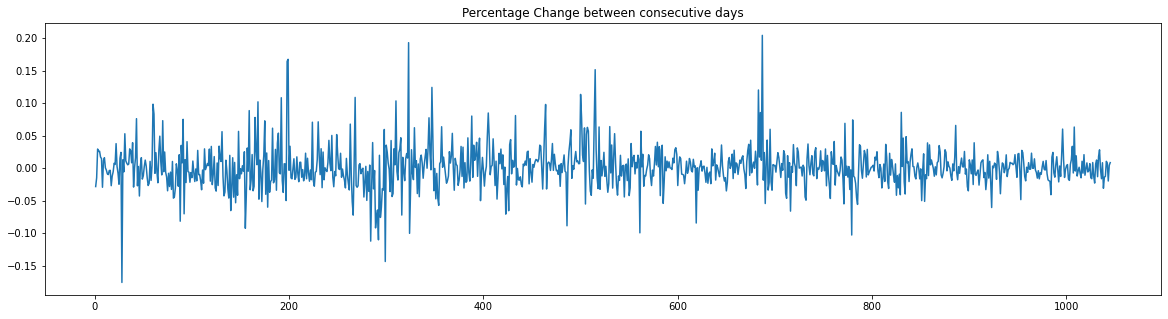

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Percentage Change between consecutive days")
plt.plot(pc.Close);

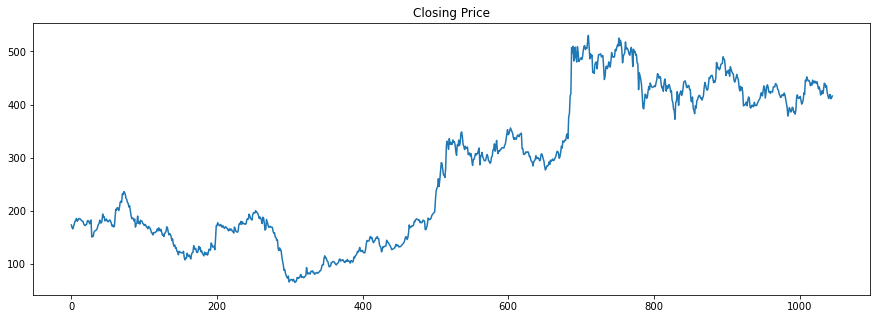

In [9]:
plt.figure(figsize=(15,5))
plt.title("Closing Price")
plt.plot(sub_df);

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(sub_df).reshape(-1,1))

In [12]:
df1

array([[0.23265567],
       [0.22211465],
       [0.21673657],
       ...,
       [0.74314291],
       [0.7470151 ],
       [0.75465201]])

In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(679, 367)

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(578, 100)
(578,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(266, 100)
(266,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

In [21]:
model=Sequential()
model.add(GRU(50,return_sequences=True,input_shape=(100,1)))
model.add(GRU(50,return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 50)           7950      
                                                                 
 gru_1 (GRU)                 (None, 100, 50)           15300     
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________


In [23]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 7s 213ms/step - loss: 0.0325 - val_loss: 0.0025
Epoch 2/100
10/10 [==============================] - 1s 110ms/step - loss: 0.0063 - val_loss: 0.0272
Epoch 3/100
10/10 [==============================] - 1s 109ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 4/100
10/10 [==============================] - 1s 108ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/100
10/10 [==============================] - 1s 107ms/step - loss: 8.0924e-04 - val_loss: 0.0011
Epoch 6/100
10/10 [==============================] - 1s 108ms/step - loss: 8.0360e-04 - val_loss: 9.1823e-04
Epoch 7/100
10/10 [==============================] - 1s 108ms/step - loss: 5.9910e-04 - val_loss: 0.0010
Epoch 8/100
10/10 [==============================] - 1s 107ms/step - loss: 5.6381e-04 - val_loss: 9.7176e-04
Epoch 9/100
10/10 [==============================] - 1s 111ms/step - loss: 5.4586e-04 - val_loss: 9.3725e-04
Epoch 10/100
10/10 [==============================] - 1s 10

10/10 [==============================] - 1s 107ms/step - loss: 2.7470e-04 - val_loss: 5.7469e-04
Epoch 77/100
10/10 [==============================] - 1s 107ms/step - loss: 2.9849e-04 - val_loss: 4.8408e-04
Epoch 78/100
10/10 [==============================] - 1s 106ms/step - loss: 2.3392e-04 - val_loss: 7.5583e-04
Epoch 79/100
10/10 [==============================] - 1s 109ms/step - loss: 2.4083e-04 - val_loss: 7.6441e-04
Epoch 80/100
10/10 [==============================] - 1s 107ms/step - loss: 2.5076e-04 - val_loss: 4.8791e-04
Epoch 81/100
10/10 [==============================] - 1s 105ms/step - loss: 2.4086e-04 - val_loss: 6.8308e-04
Epoch 82/100
10/10 [==============================] - 1s 106ms/step - loss: 2.6637e-04 - val_loss: 4.0146e-04
Epoch 83/100
10/10 [==============================] - 1s 109ms/step - loss: 3.1178e-04 - val_loss: 9.5646e-04
Epoch 84/100
10/10 [==============================] - 1s 106ms/step - loss: 3.1752e-04 - val_loss: 4.0670e-04
Epoch 85/100
10/10 [===

In [24]:
import tensorflow as tf

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 21ms/step


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

212.03738824470568

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

428.84705131983833

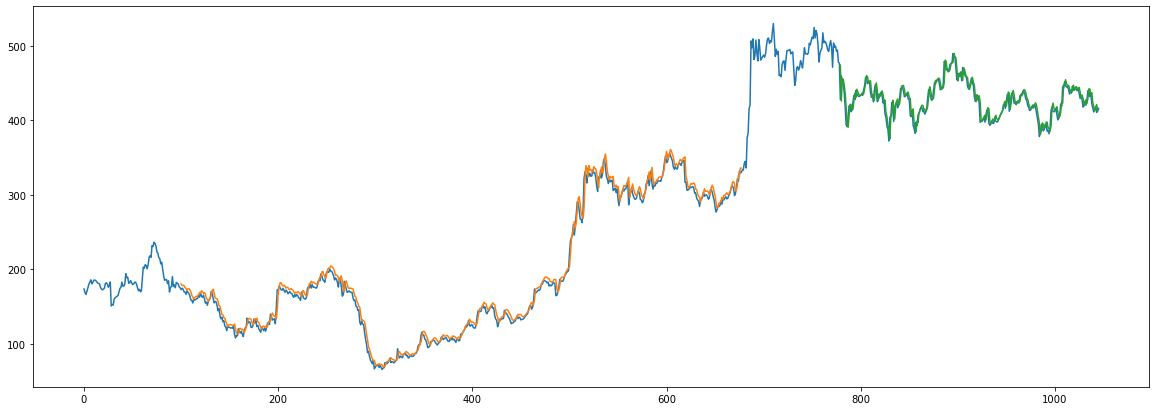

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(20,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

367

In [31]:
x_input=test_data[266:].reshape(1,-1)
x_input.shape

(1, 101)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.7413143496448286,
 0.7474453722784707,
 0.765945975938764,
 0.7676669353103028,
 0.7549746824686062,
 0.7745509018703475,
 0.7953102727729036,
 0.7913304816221572,
 0.7462622207776558,
 0.7705711107196012,
 0.7925136976599167,
 0.7999354075537407,
 0.787888498342135,
 0.7698181667931987,
 0.7712164543496921,
 0.76540816806804,
 0.7731526143138541,
 0.7717542622204161,
 0.7703559746639227,
 0.7914380819184688,
 0.7915456176778358,
 0.7913304816221572,
 0.8047756783902563,
 0.802301775092315,
 0.796170752458673,
 0.7818650760048044,
 0.7783155569654152,
 0.7632569365851442,
 0.7570183781921351,
 0.7486285237792856,
 0.750457083447136,
 0.7598149533051219,
 0.7585242015079955,
 0.7559427624506871,
 0.766483783809488,
 0.758739337563674,
 0.742605101441955,
 0.7256103856344667,
 0.7080778619562543,
 0.6734430221742422,
 0.6873184265167537,
 0.7074324537892189,
 0.7013014311555767,
 0.6896847940553281,
 0.6940948573174314,
 0.7088307413457122,
 0.7068946459184949,
 0.6890394504252372,
 0

In [34]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.74744537 0.76594598 0.76766694 0.75497468 0.7745509  0.79531027
 0.79133048 0.74626222 0.77057111 0.7925137  0.79993541 0.7878885
 0.76981817 0.77121645 0.76540817 0.77315261 0.77175426 0.77035597
 0.79143808 0.79154562 0.79133048 0.80477568 0.80230178 0.79617075
 0.78186508 0.77831556 0.76325694 0.75701838 0.74862852 0.75045708
 0.75981495 0.7585242  0.75594276 0.76648378 0.75873934 0.7426051
 0.72561039 0.70807786 0.67344302 0.68731843 0.70743245 0.70130143
 0.68968479 0.69409486 0.70883074 0.70689465 0.68903945 0.69183603
 0.681295   0.6973217  0.74776804 0.75916961 0.74636976 0.74475633
 0.74798318 0.75293099 0.7380875  0.72163059 0.72679354 0.7380875
 0.76766694 0.7609981  0.81811334 0.81391841 0.83209634 0.82037211
 0.81639232 0.81779067 0.81036889 0.79627835 0.80628157 0.79907493
 0.81865115 0.8083252  0.80724958 0.81499403 0.80950841 0.80585129
 0.81252012 0.79853712 0.78337096 0.79143808 0.77971384 0.7586318
 0.76454769 0.77594919 0.76400988 0.78025165 0.8062815

10 day output [[0.8117623]]
11 day input [0.7878885  0.76981817 0.77121645 0.76540817 0.77315261 0.77175426
 0.77035597 0.79143808 0.79154562 0.79133048 0.80477568 0.80230178
 0.79617075 0.78186508 0.77831556 0.76325694 0.75701838 0.74862852
 0.75045708 0.75981495 0.7585242  0.75594276 0.76648378 0.75873934
 0.7426051  0.72561039 0.70807786 0.67344302 0.68731843 0.70743245
 0.70130143 0.68968479 0.69409486 0.70883074 0.70689465 0.68903945
 0.69183603 0.681295   0.6973217  0.74776804 0.75916961 0.74636976
 0.74475633 0.74798318 0.75293099 0.7380875  0.72163059 0.72679354
 0.7380875  0.76766694 0.7609981  0.81811334 0.81391841 0.83209634
 0.82037211 0.81639232 0.81779067 0.81036889 0.79627835 0.80628157
 0.79907493 0.81865115 0.8083252  0.80724958 0.81499403 0.80950841
 0.80585129 0.81252012 0.79853712 0.78337096 0.79143808 0.77971384
 0.7586318  0.76454769 0.77594919 0.76400988 0.78025165 0.80628157
 0.80456054 0.78928685 0.79713883 0.76820474 0.75583516 0.74443366
 0.75379153 0.7608905

20 day output [[0.8463811]]
21 day input [0.80477568 0.80230178 0.79617075 0.78186508 0.77831556 0.76325694
 0.75701838 0.74862852 0.75045708 0.75981495 0.7585242  0.75594276
 0.76648378 0.75873934 0.7426051  0.72561039 0.70807786 0.67344302
 0.68731843 0.70743245 0.70130143 0.68968479 0.69409486 0.70883074
 0.70689465 0.68903945 0.69183603 0.681295   0.6973217  0.74776804
 0.75916961 0.74636976 0.74475633 0.74798318 0.75293099 0.7380875
 0.72163059 0.72679354 0.7380875  0.76766694 0.7609981  0.81811334
 0.81391841 0.83209634 0.82037211 0.81639232 0.81779067 0.81036889
 0.79627835 0.80628157 0.79907493 0.81865115 0.8083252  0.80724958
 0.81499403 0.80950841 0.80585129 0.81252012 0.79853712 0.78337096
 0.79143808 0.77971384 0.7586318  0.76454769 0.77594919 0.76400988
 0.78025165 0.80628157 0.80456054 0.78928685 0.79713883 0.76820474
 0.75583516 0.74443366 0.75379153 0.76089057 0.74314291 0.7470151
 0.75465201 0.75946337 0.76508063 0.77058685 0.77609301 0.78156322
 0.78695488 0.79223359 

In [35]:
for i in range(0,30):
    print("Day {} output{}".format(i,lst_output[i]))

Day 0 output[0.759463369846344]
Day 1 output[0.7650806307792664]
Day 2 output[0.7705868482589722]
Day 3 output[0.7760930061340332]
Day 4 output[0.7815632224082947]
Day 5 output[0.7869548797607422]
Day 6 output[0.7922335863113403]
Day 7 output[0.7973724603652954]
Day 8 output[0.8023506999015808]
Day 9 output[0.8071515560150146]
Day 10 output[0.811762273311615]
Day 11 output[0.8161730170249939]
Day 12 output[0.8203769326210022]
Day 13 output[0.8243691921234131]
Day 14 output[0.8281470537185669]
Day 15 output[0.8317099809646606]
Day 16 output[0.8350589275360107]
Day 17 output[0.8381963968276978]
Day 18 output[0.8411259055137634]
Day 19 output[0.8438523411750793]
Day 20 output[0.8463811278343201]
Day 21 output[0.8487187623977661]
Day 22 output[0.8508720993995667]
Day 23 output[0.8528489470481873]
Day 24 output[0.8546571135520935]
Day 25 output[0.8563050031661987]
Day 26 output[0.8578008413314819]
Day 27 output[0.8591529726982117]
Day 28 output[0.8603699207305908]
Day 29 output[0.8614603281

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
len(df1)

1046

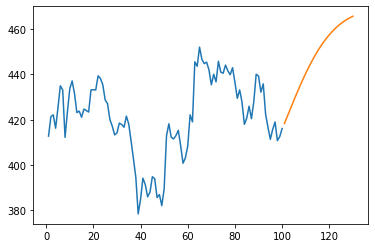

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[946:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output));

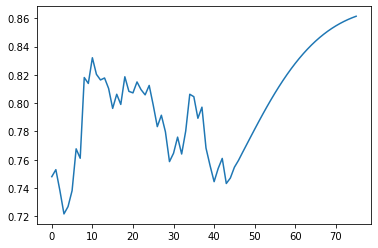

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:]);

In [41]:
df3=scaler.inverse_transform(df3).tolist()

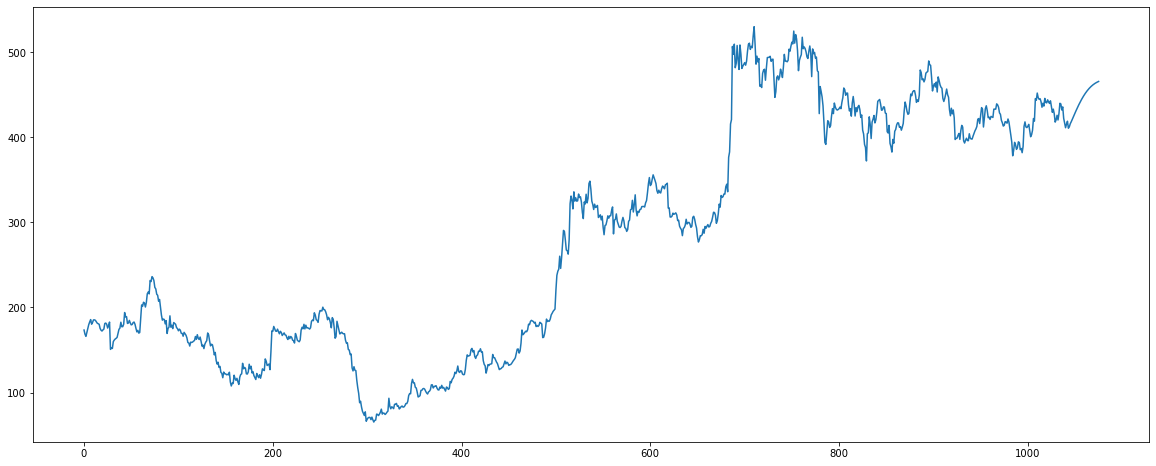

In [42]:
plt.figure(figsize=(20,8))
plt.plot(df3);

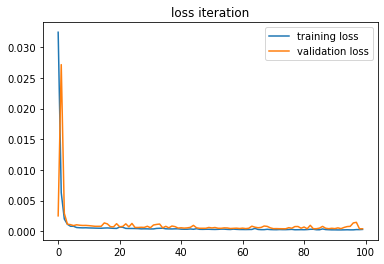

In [43]:
plt.title("loss iteration")
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend();